In [ ]:
!pip install -q super-gradients
!pip install -q roboflow
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... do

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
img = plt.imread("/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg")

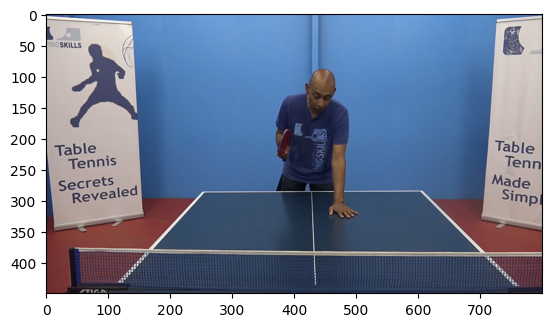

In [ ]:
plt.imshow(img)

In [ ]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
MODEL_ARCH = 'yolo_nas_l'

In [ ]:
SOURCE_IMAGE_PATH = r"/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg"

In [ ]:
from super_gradients.training import models

model = models.get(MODEL_ARCH, pretrained_weights="coco").to(DEVICE)

[2023-08-08 08:32:15] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-08-08 08:32:22] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-08 08:32:22] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-08 08:32:22] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-08 08:32:22] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-08 08:32:23] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 2

In [ ]:
import cv2

image = cv2.imread(SOURCE_IMAGE_PATH)
result = list(model.predict(image, conf=0.35))[0]

[2023-08-08 08:32:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [ ]:
type(result)

super_gradients.training.utils.predict.prediction_results.ImageDetectionPrediction

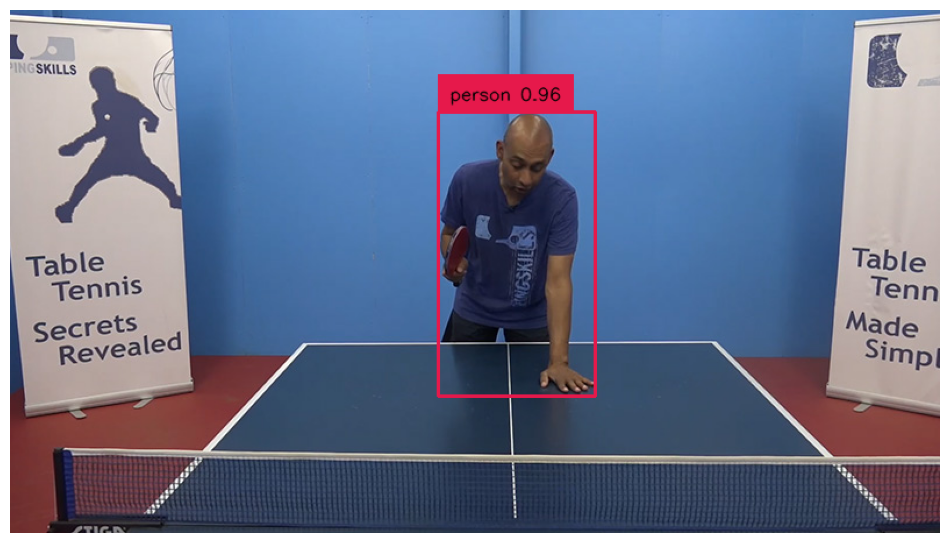

In [ ]:
import supervision as sv

detections = sv.Detections(
    xyxy=result.prediction.bboxes_xyxy,
    confidence=result.prediction.confidence,
    class_id=result.prediction.labels.astype(int)
)

box_annotator = sv.BoxAnnotator()

labels = [
    f"{result.class_names[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections
]

annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    labels=labels
)

%matplotlib inline
sv.plot_image(annotated_frame, (12, 12))

In [ ]:
original_img = cv2.imread(SOURCE_IMAGE_PATH,cv2.IMREAD_COLOR)
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray,(3,3),0)

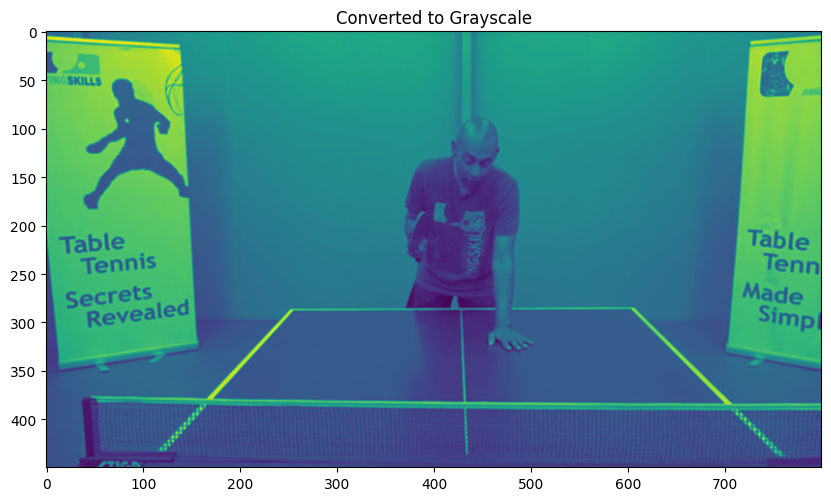

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(blur_img)
plt.title("Converted to Grayscale")
plt.show()

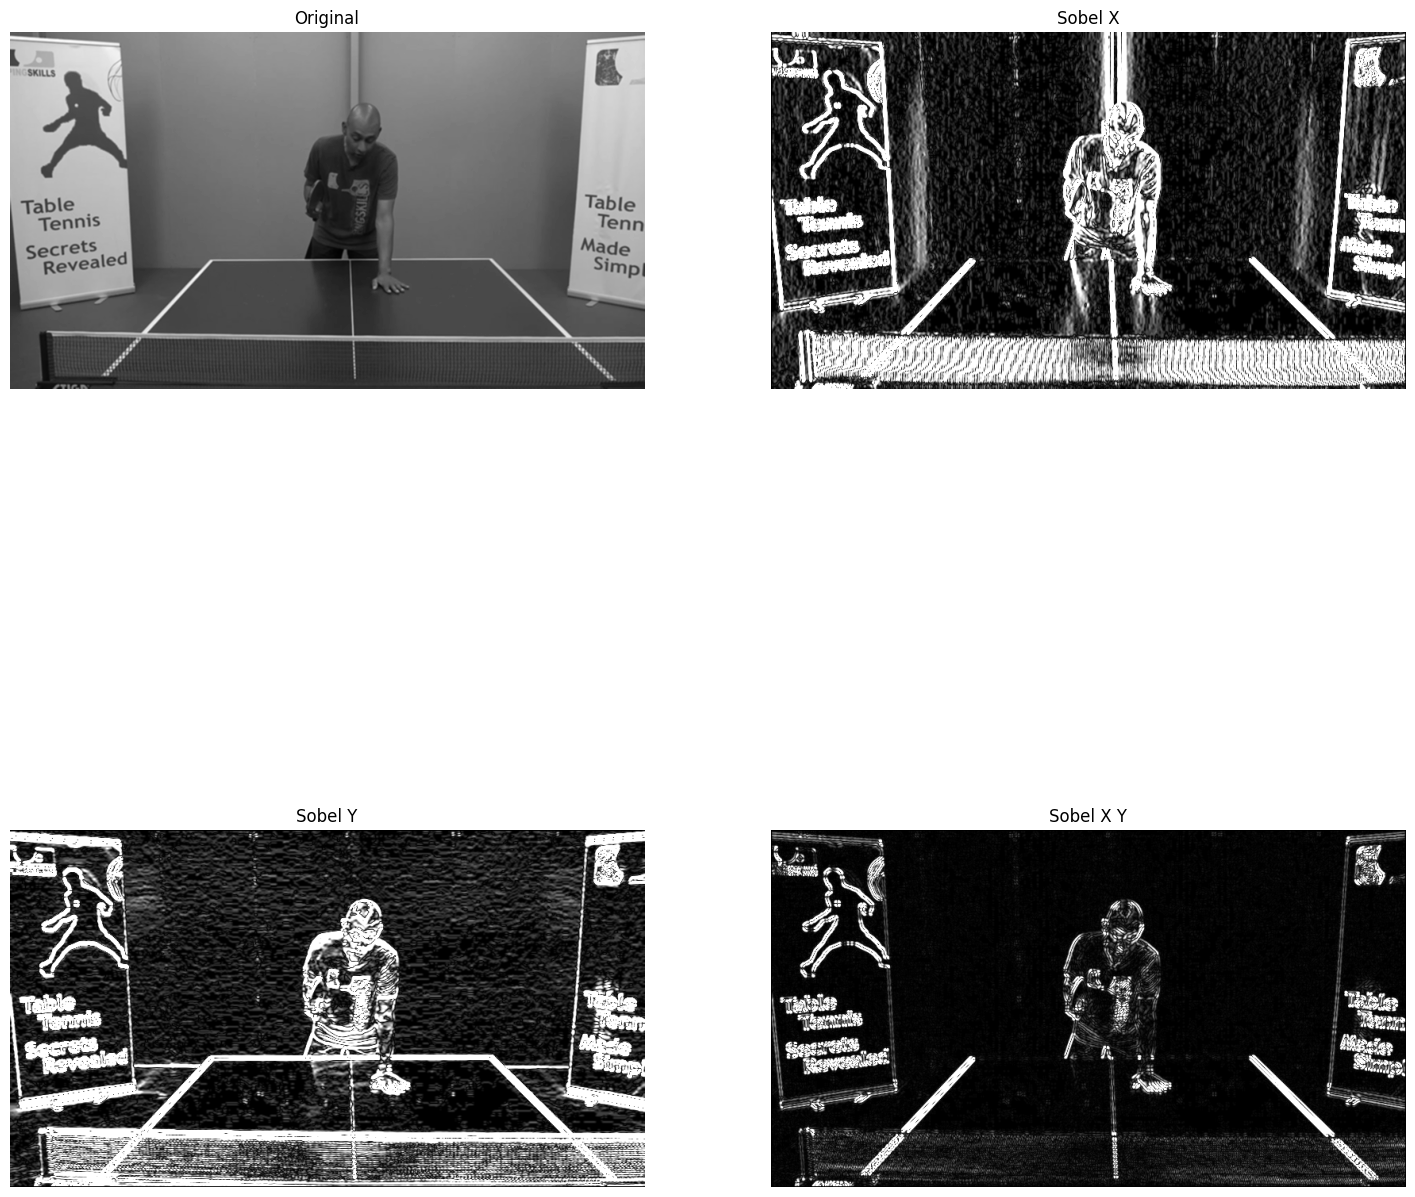

In [ ]:
sobelx = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
filtered_image_x = cv2.convertScaleAbs(sobelx)

sobely = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
filtered_image_y = cv2.convertScaleAbs(sobely)

sobelxy = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
filtered_image_xy = cv2.convertScaleAbs(sobelxy)

plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(blur_img, cmap='gray')
plt.title('Original')
plt.axis("off")

plt.subplot(222)
plt.imshow(filtered_image_x, cmap='gray')
plt.title('Sobel X')
plt.axis("off")

plt.subplot(223)
plt.imshow(filtered_image_y, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

plt.subplot(224)
plt.imshow(filtered_image_xy, cmap='gray')
plt.title('Sobel X Y')
plt.axis("off")
plt.show()


In [ ]:
from PIL import Image

filtered_image_pil = Image.fromarray(filtered_image_xy)

filtered_image_pil.save("new.jpg")


In [ ]:
image = cv2.imread("/content/new.jpg")
result = list(model.predict(image, conf=0.35))[0]

[2023-08-08 08:32:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


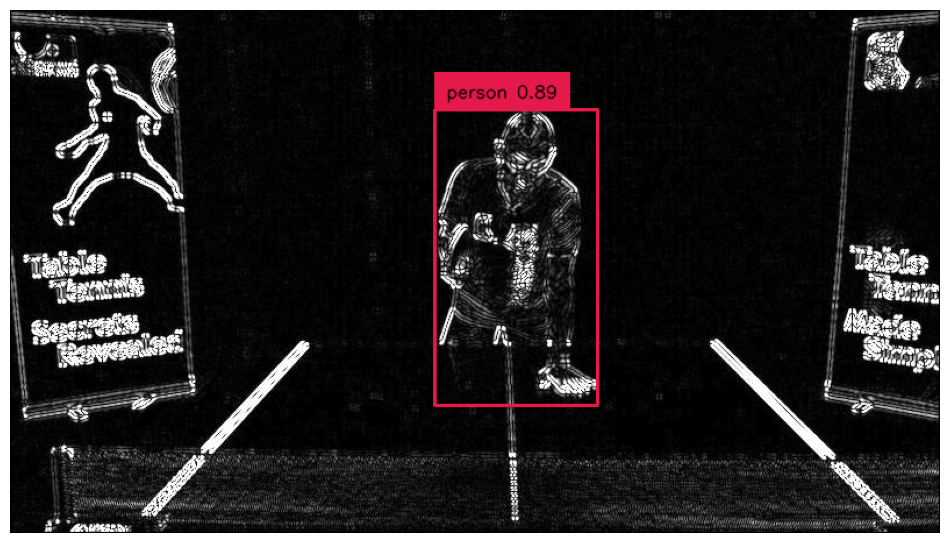

In [ ]:
import supervision as sv

detections = sv.Detections(
    xyxy=result.prediction.bboxes_xyxy,
    confidence=result.prediction.confidence,
    class_id=result.prediction.labels.astype(int)
)

box_annotator = sv.BoxAnnotator()

labels = [
    f"{result.class_names[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections
]

annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    labels=labels
)

%matplotlib inline
sv.plot_image(annotated_frame, (12, 12))

In [ ]:
from PIL import Image

filtered_image_pil = Image.fromarray(annotated_frame)

filtered_image_pil.save("new.jpg")


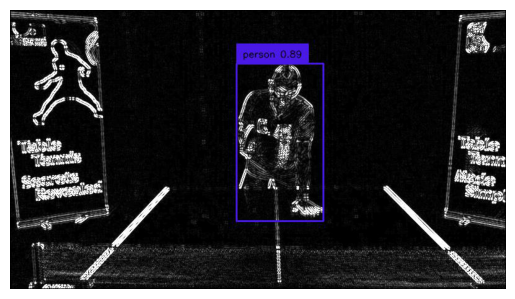

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "/content/new.jpg"
img = Image.open(image_path)

img_array = np.array(img)

plt.imshow(img_array)
plt.axis('off')
plt.show()

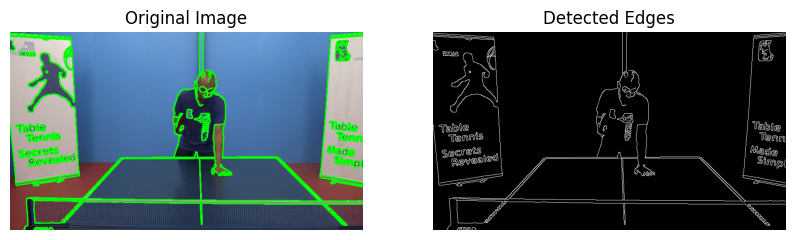

In [ ]:
import cv2
import matplotlib.pyplot as plt

def detect_table_edges(image_path):

    img = cv2.imread(image_path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find and draw contours (optional)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(edges, cmap='gray')
    plt.title('Detected Edges')
    plt.axis('off')

    plt.show()

image_path = "/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg"
detect_table_edges(image_path)


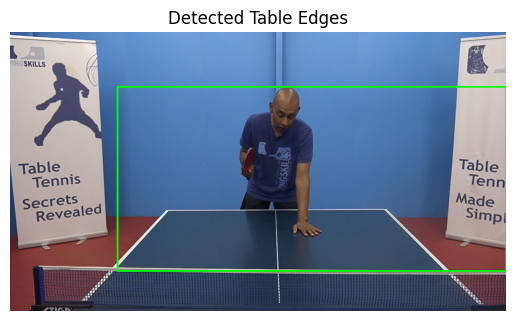

In [ ]:
import cv2
import matplotlib.pyplot as plt

def detect_table_edges(image_path):
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find and draw contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area (the table)
    table_contour = max(contours, key=cv2.contourArea)

    x, y, w, h = cv2.boundingRect(table_contour)

    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Table Edges')
    plt.axis('off')
    plt.show()

    return x, y, x + w, y + h

image_path = "/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg"
x1, y1, x2, y2 = detect_table_edges(image_path)
print("Table edges coordinates: (x1, y1) =", (x1, y1), " (x2, y2) =", (x2, y2))


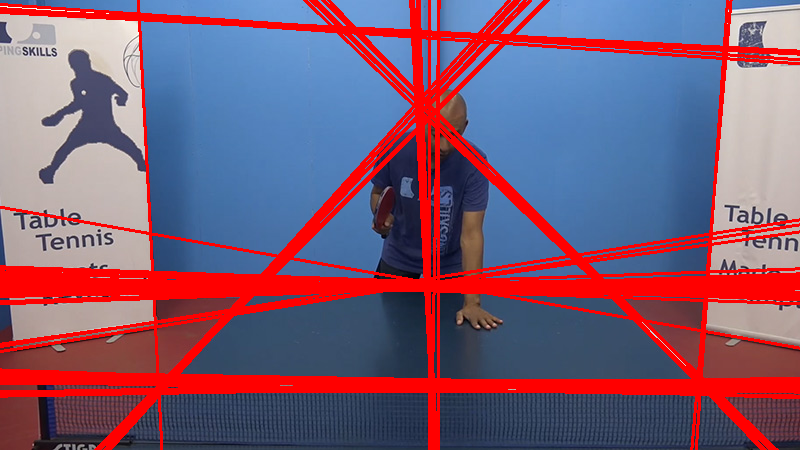

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_table_edges(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred_image, 50, 150)

    # Use Hough Line Transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

    # Use Hough Circle Transform to detect circles (corners)
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=100, param2=30, minRadius=5, maxRadius=30)

    # Convert Hough line representation to points
    line_points = []
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        line_points.append([(x1, y1), (x2, y2)])

    # Convert Hough circle representation to integers
    circle_points = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            circle_points.append((x, y, r))

    return line_points, circle_points

if __name__ == "__main__":
    # Replace 'path_to_image.jpg' with the actual path to your image
    image_path = '/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg'
    lines, circles = detect_table_edges(image_path)

    # Draw the detected lines and circles on the original image
    image_with_lines = np.copy(cv2.imread(image_path))
    for line in lines:
        cv2.line(image_with_lines, line[0], line[1], (0, 0, 255), 2)
    for (x, y, r) in circles:
        cv2.circle(image_with_lines, (x, y), r, (0, 255, 0), 2)

    cv2_imshow(image_with_lines)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


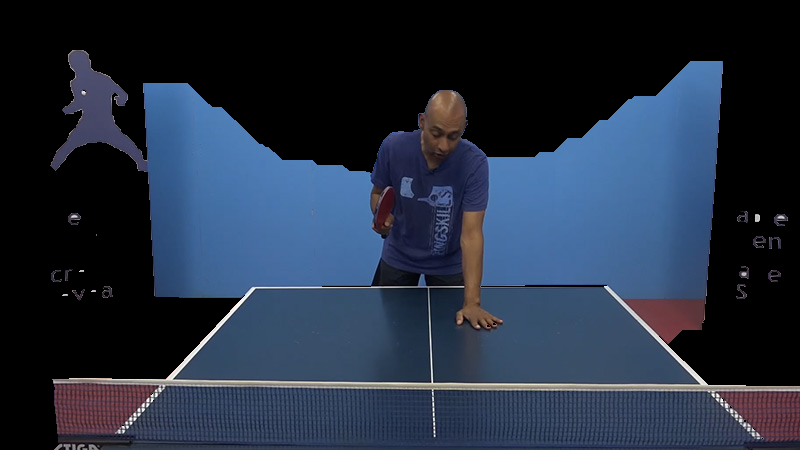

In [ ]:
import cv2
import numpy as np

def segment_table(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Create a mask (1-channel) of zeros with same dimensions as the input image
    mask = np.zeros(image.shape[:2], np.uint8)

    # Define the background and foreground model
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Define the region of interest (ROI) for GrabCut
    rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

    # Perform GrabCut segmentation
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

    # Create a mask where the probable background and definite background are set to 0, others to 1
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Apply the mask to the original image to get the segmented table
    segmented_table = image * mask2[:, :, np.newaxis]

    return segmented_table

if __name__ == "__main__":

    image_path = '/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg'
    segmented_table = segment_table(image_path)

    cv2_imshow(segmented_table)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



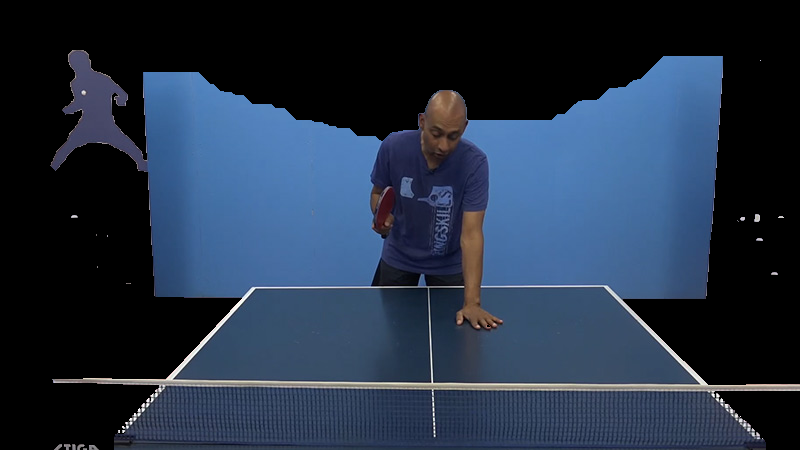

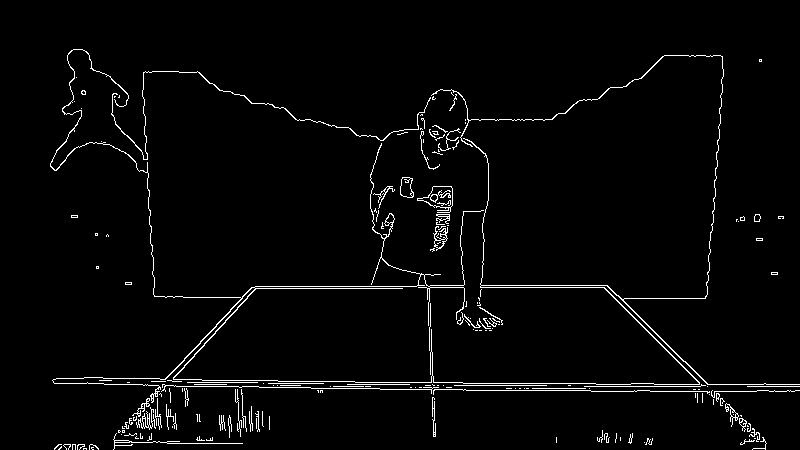

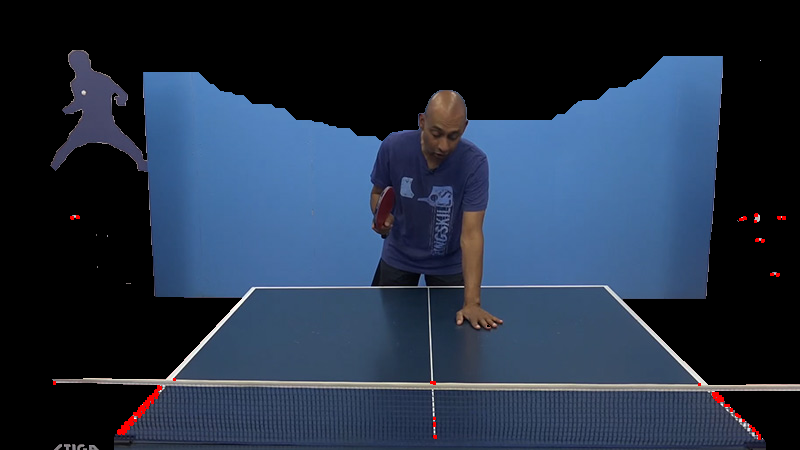

In [ ]:
import cv2
import numpy as np

def segment_table(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Create a mask (1-channel) of zeros with the same dimensions as the input image
    mask = np.zeros(image.shape[:2], np.uint8)

    # Define the background and foreground model
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Define the region of interest (ROI) for GrabCut
    rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

    # Perform GrabCut segmentation
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

    # Create a mask where the probable background and definite background are set to 0, others to 1
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Apply the mask to the original image to get the segmented table
    segmented_table = image * mask2[:, :, np.newaxis]

    # Detect edges using Canny edge detection
    edges = cv2.Canny(segmented_table, 100, 200)

    # Detect corners using Harris corner detection
    gray = cv2.cvtColor(segmented_table, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    corner_threshold = 0.1 * corners.max()
    corner_image = segmented_table.copy()
    corner_image[corners > corner_threshold] = [0, 0, 255]  # Mark corners in red


    return segmented_table, edges, corner_image


if __name__ == "__main__":

    image_path = '/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg'
    segmented_table, edges, corner_image = segment_table(image_path)

    cv2_imshow(segmented_table)
    cv2_imshow( edges)
    cv2_imshow(corner_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


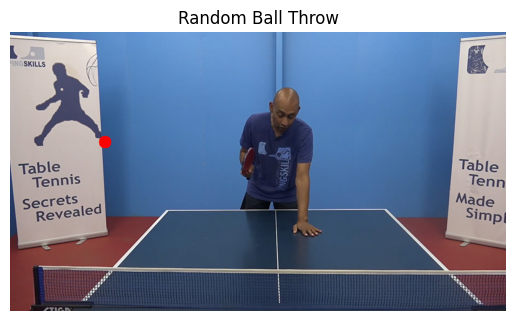

Ball coordinates: (x, y) = (153, 177)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def random_throw_ball(image_path, ball_radius=10):

    img = cv2.imread(image_path)

    # Generate random coordinates for the ball's position within the table's area
    table_x1, table_y1, table_x2, table_y2 = 100, 100, 400, 300
    ball_x = np.random.randint(table_x1 + ball_radius, table_x2 - ball_radius)
    ball_y = np.random.randint(table_y1 + ball_radius, table_y2 - ball_radius)

    # Draw the ball on the image
    cv2.circle(img, (ball_x, ball_y), ball_radius, (0, 0, 255), -1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Random Ball Throw')
    plt.axis('off')
    plt.show()

    return ball_x, ball_y


image_path = "/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg"
ball_radius = 10
ball_x, ball_y = random_throw_ball(image_path, ball_radius)
print("Ball coordinates: (x, y) =", (ball_x, ball_y))


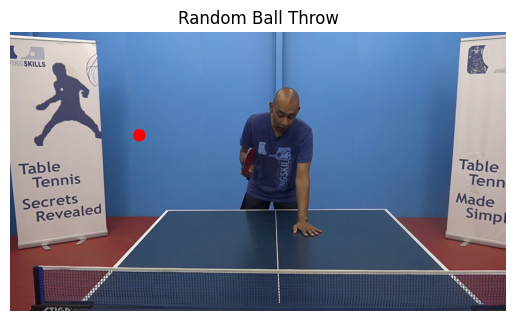

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_valid_position(x, y, table_x1, table_y1, table_x2, table_y2, ball_radius):
    # Check if the position (x, y) is inside the table's area
    return (table_x1 + ball_radius <= x <= table_x2 - ball_radius) and (table_y1 + ball_radius <= y <= table_y2 - ball_radius)

def random_throw_ball(image_path, ball_radius=10):
    # Load the image
    img = cv2.imread(image_path)

    # Define the coordinates of the table's bounding box
    table_x1, table_y1, table_x2, table_y2 = 100, 100, 400, 300

    # Generate random coordinates for the ball's position within the table's area
    while True:
        ball_x = np.random.randint(table_x1 + ball_radius, table_x2 - ball_radius)
        ball_y = np.random.randint(table_y1 + ball_radius, table_y2 - ball_radius)
        if is_valid_position(ball_x, ball_y, table_x1, table_y1, table_x2, table_y2, ball_radius):
            break

    # Draw the ball on the image
    cv2.circle(img, (ball_x, ball_y), ball_radius, (0, 0, 255), -1)

    # Display the image with the ball
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Random Ball Throw')
    plt.axis('off')
    plt.show()

    # Return the coordinates of the ball
    return ball_x, ball_y

# Example usage:
image_path = "/content/Why-Do-Ping-Pong-Players-Touch-The-Table.jpg"  # Replace with the path to your table tennis table image
ball_radius = 10  # Replace with the desired radius of the ball
ball_x, ball_y = random_throw_ball(image_path, ball_radius)
print("Ball coordinates: (x, y) =", (ball_x, ball_y))
